In [1]:
if 'google.colab' in str(get_ipython()):
    import sys
    from google.colab import drive, output
    drive.mount('/content/drive')
    !pip install torchaudio
    !pip install wandb --upgrade
    !wandb login
    # !pip install umap-learn
    output.clear()
    print("Running on colab")
    %load_ext autoreload
    %autoreload 1
    %cd '/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project'
    #sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/data')
    #sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/models')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Dataloader')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Models')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Modules')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Results/Results')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Results/Figures')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Result')
    
elif "zmqshell" in str(get_ipython()):
    print("Running on MIRP")
else:
    print("Running in personal pc")    

Running on MIRP


In [2]:
# from __future__ import print_function
import os
import matplotlib.pyplot as plt
import numpy as np

from six.moves import xrange
import datetime
import gc

from scipy import signal

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torchaudio.transforms as audio_transform

#from ResidualStack import ResidualStack
#from Residual import Residual

from Jaguas_DataLoader import SoundscapeData
from Models import ConvAE as AE
from AE_training_functions import TestModel, TrainModel
from AE_Clustering import AE_Clustering 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = xm.xla_device()
print(device)

from datetime import timedelta
import wandb
# from wandb import AlertLevel

# wandb.login()

C:\Users\alexi\anaconda3\envs\PhD\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [3]:
root_path = 'ConservacionBiologicaIA/Datos/Jaguas_2018'


dataset = SoundscapeData(root_path, audio_length=12, ext="wav", win_length=1028)
dataset_train, dataset_test = random_split(dataset,
                                           [round(len(dataset)*0.7), len(dataset) - round(len(dataset)*0.7)], 
                                           generator=torch.Generator().manual_seed(1024))

config = {
    "project" : "AE-Jaguas",
    "audio_length": dataset.audio_length,
    "batch_size" : 14,
    "num_epochs": 3,
    "num_hiddens" : 64,
    "gamma_lr" : 0.1,
    "learning_rate" : 1e-3,
    "dataset" : "Audios Jaguas",
    "architecture": "AE",
    "win_length" : dataset.win_length
}

training_loader = DataLoader(dataset_train, batch_size=config["batch_size"])
test_loader = DataLoader(dataset_test, batch_size=config["batch_size"])

model = AE(num_hiddens=config["num_hiddens"]).to(device)

optimizer = optim.Adam(model.parameters(), lr=config["learning_rate"], amsgrad=False)
scheduler = lr_scheduler.StepLR(optimizer, step_size = 6, gamma = config["gamma_lr"] )

config["optimizer"] = optimizer
config["scheduler"] = scheduler
config["num_training_updates"] = len(training_loader)

G:/Unidades compartidas/ConservacionBiologicaIA/Datos/Jaguas_2018


In [4]:
iterador = iter(training_loader)
a, b, c, d = next(iterador)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


cuda


wandb: Currently logged in as: danielnieto. Use `wandb login --relogin` to force relogin


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 1 of 1004 	 loss: 0.4253
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 2 of 1004 	 loss: 0.3864
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 3 of 1004 	 loss: 0.4238
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 4 of 1004 	 loss: 0.4178
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 5 of 1004 	 loss: 0.4829
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 6 of 1004 	 loss: 0.4766
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 7 of 1004 	 loss: 0.3771
encoder_shape

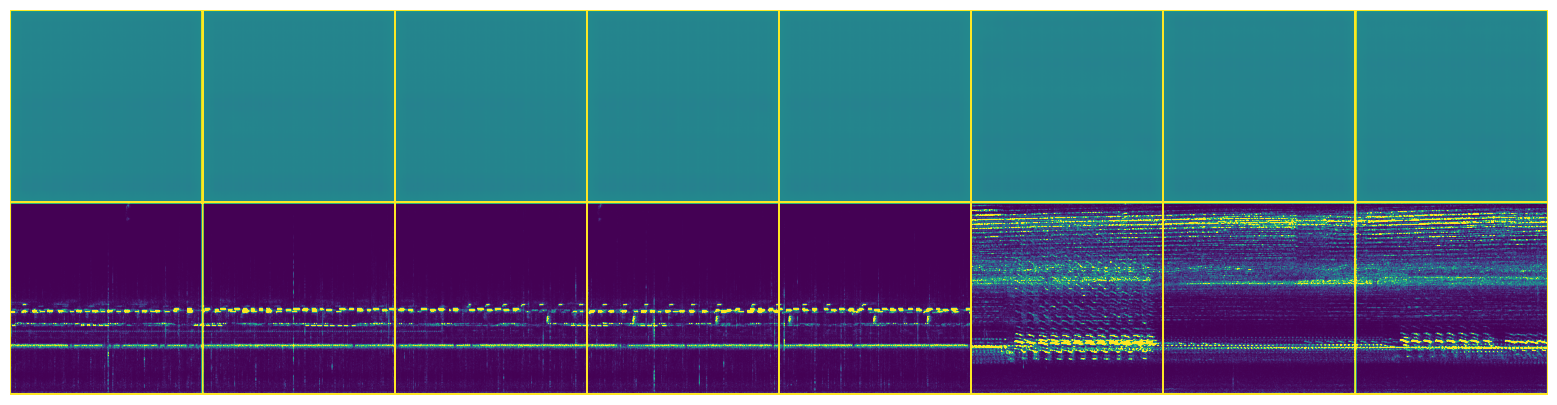

encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 21 of 1004 	 loss: 0.4668
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 22 of 1004 	 loss: 0.3972
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 23 of 1004 	 loss: 0.3747
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 24 of 1004 	 loss: 0.2965
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 25 of 1004 	 loss: 0.3187
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 26 of 1004 	 loss: 0.5385
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 27 of 1004 	 loss: 0.3877
encode

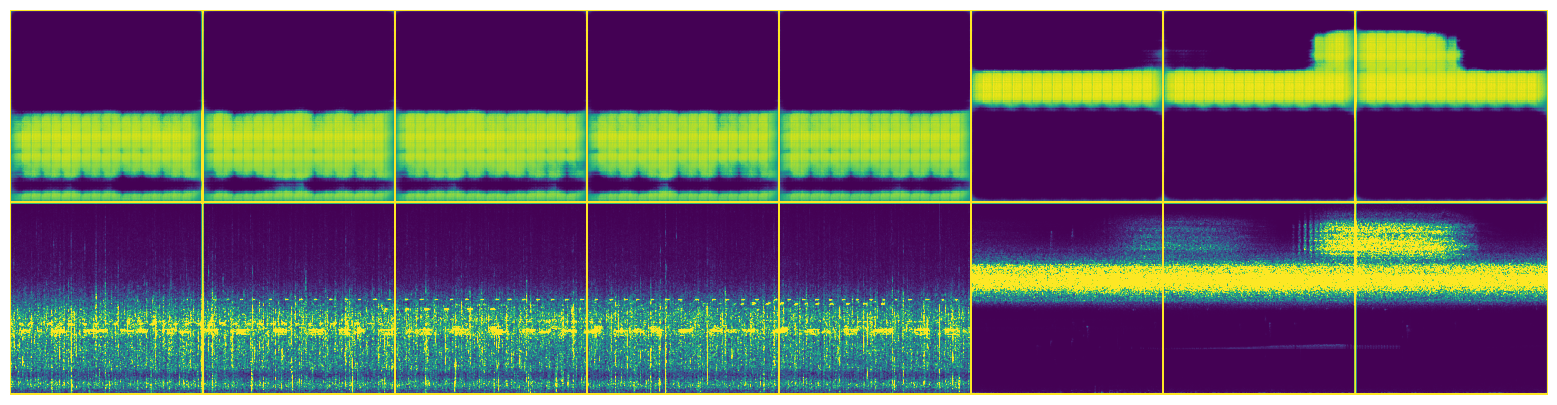

encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 61 of 1004 	 loss: 0.2705
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 62 of 1004 	 loss: 0.194
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 63 of 1004 	 loss: 0.3318
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 64 of 1004 	 loss: 0.1682
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 65 of 1004 	 loss: 0.2102
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 66 of 1004 	 loss: 0.2152
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 67 of 1004 	 loss: 0.3059
encoder

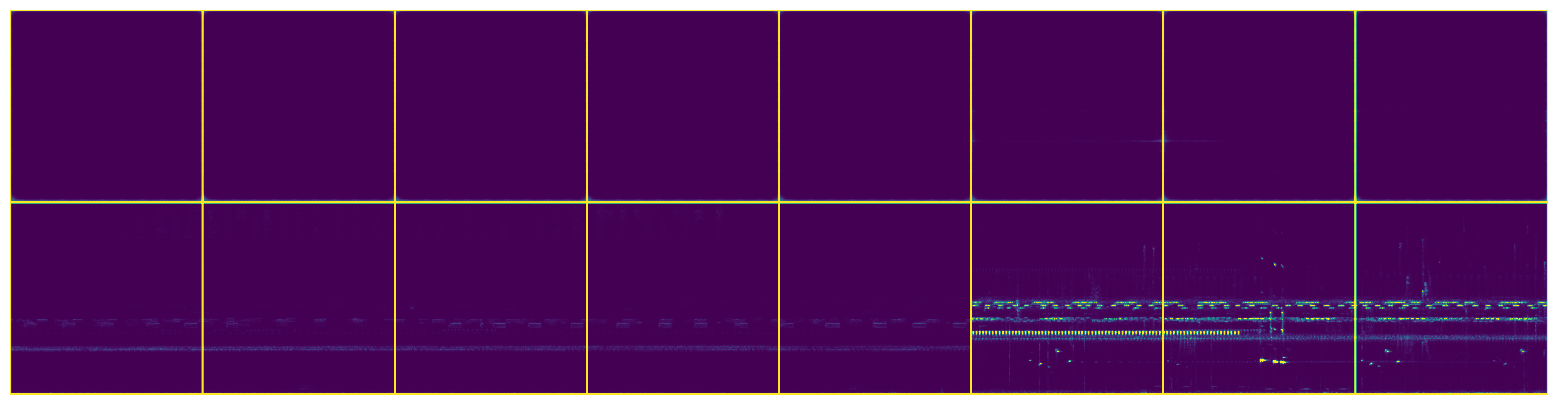

encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 81 of 1004 	 loss: 0.2244
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 82 of 1004 	 loss: 0.1525
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 83 of 1004 	 loss: 0.2385
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 84 of 1004 	 loss: 0.1776
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 85 of 1004 	 loss: 0.252
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 86 of 1004 	 loss: 0.1516
encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 87 of 1004 	 loss: 0.2254
encoder

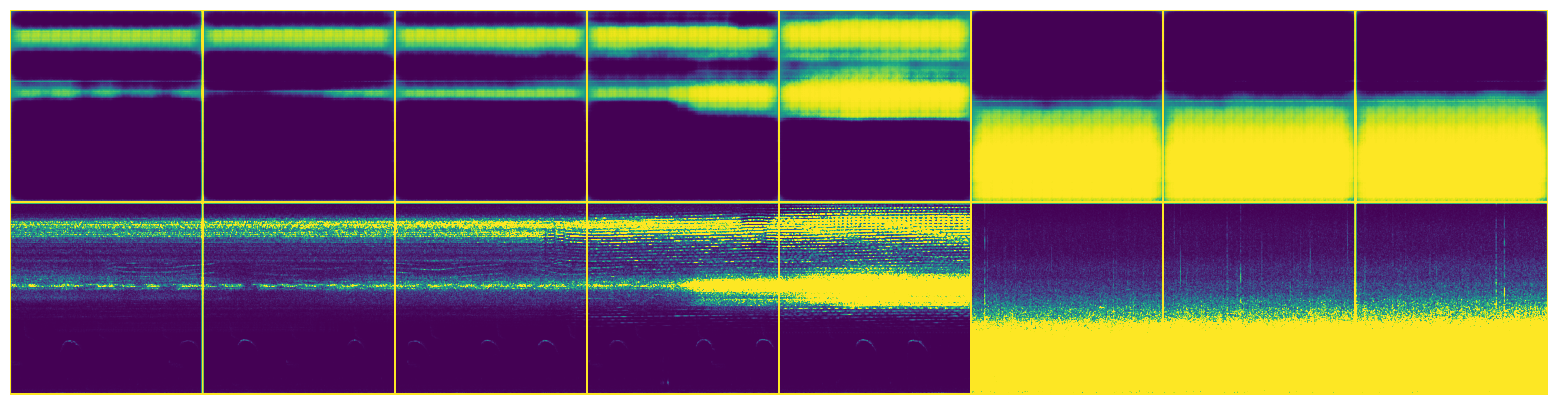

encoder_shape:  torch.Size([70, 64, 9, 9])
decoder_shape:  torch.Size([70, 1, 515, 515])
epoch: 1 of 3 	 iteration: 101 of 1004 	 loss: 0.118
error
System error.


In [ ]:
Training = TrainModel(model)
model, logs, run_name = Training.fordward(training_loader, test_loader, config)
time = datetime.datetime.now()
torch.save(model.state_dict(),f'{run_name}_day_{time.day}_hour_{time.hour}_final.pth')
torch.save(config,f'config_{run_name}_day_{time.day}_hour_{time.hour}.pth')
torch.save(dataset_test, f"temporal/dataset_test_ae_jaguas_{time.day}_70%.pth")
torch.save(dataset_train, f"temporal/dataset_train_ae_jaguas_{time.day}_70%.pth")

In [ ]:
dataset_test = torch.load(f'temporal/dataset_test_ae_jaguas')
dataset_train = torch.load(f'temporal/dataset_train_ae_jaguas')
model.load_state_dict(torch.load(f'Models/AE_batch_size_14_num_hiddens_64__day_4_hour_1_epoch_3.pkl', map_location=torch.device('cpu')))

In [ ]:
# root_path = '/content/drive/Shareddrives/ConservacionBiologicaIA/Datos/Porce_2019'


# dataset = SoundscapeData(root_path, audio_length=12, ext="WAV", win_length=1028)
# dataset_train, dataset_test = random_split(dataset,
#                                            [round(len(dataset)*0.7), len(dataset) - round(len(dataset)*0.7)], 
#                                            generator=torch.Generator().manual_seed(1024))
# Dataset_train = DataLoader(dataset_train, batch_size=54, shuffle=True)
# Dataset = DataLoader(dataset_test, batch_size=54, shuffle=True)

training_loader = DataLoader(dataset_train, batch_size=100)
test_loader = DataLoader(dataset_test, batch_size=100)
iterator = iter(test_loader)
testing = TestModel(model, iterator, device=torch.device("cuda"))


In [ ]:
originals, reconstructions, encodings, label, loss= testing.run()

In [ ]:
wav_origin=testing.waveform_generator(spec=originals)
print(wav_origin[0:1])
wav_origin = np.interp(wav_origin, (wav_origin.min(), wav_origin.max()), (-1, +1))
print(wav_origin[0:1])
wav_recons=testing.waveform_generator(spec=reconstructions)
wav_recons= np.interp(wav_recons, (wav_recons.min(), wav_recons.max()), (-1, +1))
testing.plot_psd(wav_origin[0:4],2)
testing.plot_psd(wav_origin[10:14],2)
#testing.plot_psd(wav_origin[18:22],2)
plt.savefig("original_psd.pdf")
plt.figure()
testing.plot_psd(wav_recons[0:4],2)
testing.plot_psd(wav_recons[10:14],2)
#testing.plot_psd(wav_recons[18:22],2)
plt.savefig("recon_psd.pdf")
wav_diff = wav_origin-wav_recons
plt.figure()
testing.plot_psd(wav_diff,4)

In [ ]:
wav_origin=testing.waveform_generator(spec=originals)
print(wav_origin[0:1])
wav_origin = np.interp(wav_origin, (wav_origin.min(), wav_origin.max()), (-1, +1))
print(wav_origin[0:1])
wav_recons=testing.waveform_generator(spec=reconstructions)
wav_recons= np.interp(wav_recons, (wav_recons.min(), wav_recons.max()), (-1, +1))
testing.plot_psd(wav_origin,2)
plt.savefig("original_psd.pdf")
plt.figure()
testing.plot_psd(wav_recons,2)
plt.savefig("recon_psd.pdf")
wav_diff = wav_origin-wav_recons
plt.figure()
testing.plot_psd(wav_diff,4)


In [ ]:
plt.plot(wav_origin[12,0])
plt.plot(wav_recons[12,0], color='red', alpha = 0.4)

In [ ]:
# encodings_size = [64,9,9]
# plt.figure(figsize=(18, 18))
# model.to("cpu")
# for i, spec in enumerate(kmeans.cluster_centers_):
#     encodings = spec.reshape(encodings_size)
#     encodings = torch.tensor(encodings).float()
#     decodings = model.decoder(encodings).detach().numpy()
#     plt.subplot(9, 9, i + 1)
#     plt.imshow(decodings[0,:,:], cmap="inferno", interpolation="nearest",vmin=0, vmax=0.02)
#     plt.xticks(())
#     plt.yticks(())
